Compatibilidad total:0.86%
Compatibilidad por dimensión: [0.8  0.95 0.7  0.9  0.9  0.95]


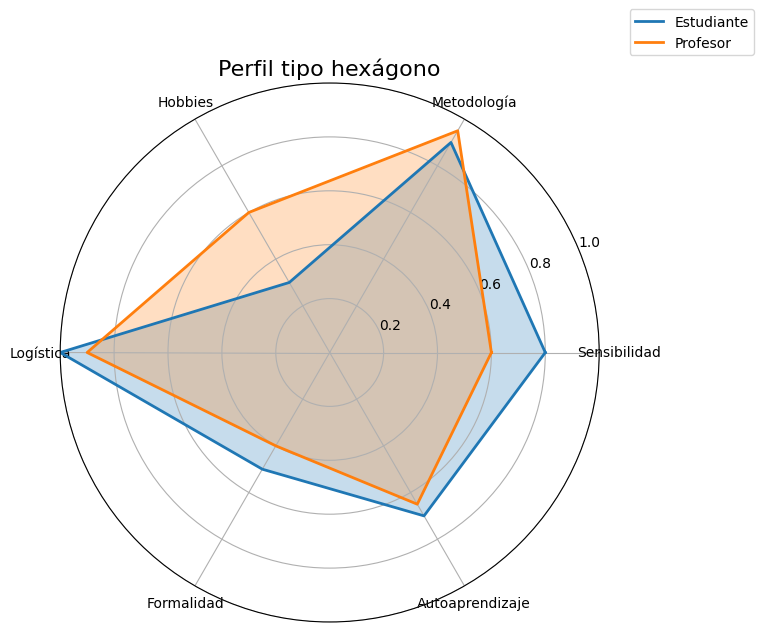

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. DEFINICIÓN DE DIMENSIONES (pueden editarse)
# ==========================================
dimensions = [
    "Sensibilidad",
    "Metodología",
    "Hobbies",
    "Logística",
    "Formalidad",
    "Autoaprendizaje"
]

N = len(dimensions)

# ==========================================
# 2. FUNCIONES DE CÁLCULO
# ==========================================

def cosine_similarity(a, b):
    """Cálculo de similitud coseno entre dos vectores."""
    a = np.array(a)
    b = np.array(b)
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


def compatibility(student, teacher, weights=None):
    """
    Calcula compatibilidad ponderada entre dos perfiles.
    Ambos perfiles son arrays normalizados [0,1].
    """
    student = np.array(student)
    teacher = np.array(teacher)

    if weights is None:
        weights = np.ones(N) / N  # pesos iguales

    # puntuación por dimensión (1 - distancia absoluta)
    sub_scores = 1 - np.abs(student - teacher)

    # compatibilidad final
    final = np.sum(sub_scores * weights)

    return float(final), sub_scores


# ==========================================
# 3. FUNCIÓN PARA GRAFICAR HEXÁGONO
# ==========================================

def plot_radar(student, teacher):
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    student_plot = student + [student[0]]
    teacher_plot = teacher + [teacher[0]]
    angles_plot = angles + [angles[0]]

    fig = plt.figure(figsize=(7,7))
    ax = plt.subplot(111, polar=True)

    # Dibujar estudiante
    ax.plot(angles_plot, student_plot, linewidth=2, label="Estudiante")
    ax.fill(angles_plot, student_plot, alpha=0.25)

    # Dibujar profesor
    ax.plot(angles_plot, teacher_plot, linewidth=2, label="Profesor")
    ax.fill(angles_plot, teacher_plot, alpha=0.25)

    # Poner etiquetas de los ejes
    ax.set_xticks(angles)
    ax.set_xticklabels(dimensions)

    ax.set_ylim(0, 1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.15))
    plt.title("Perfil tipo hexágono", size=16)

    plt.show()


# ==========================================
# 4. EJEMPLO DE USO
# ==========================================

# Perfil del estudiante (valores normalizados 0–1)
student_profile = [
    0.8,  # sensibilidad
    0.9,  # metodología
    0.3,  # hobbies
    1.0,  # logística
    0.5,  # formalidad
    0.7   # autoaprendizaje
]

# Perfil del profesor
teacher_profile = [
    0.6,
    0.95,
    0.6,
    0.9,
    0.4,
    0.65
]

# Pesos (opcionales)
weights = np.array([0.25, 0.25, 0.15, 0.15, 0.1, 0.1])

score, subs = compatibility(student_profile, teacher_profile, weights)

print(f"Compatibilidad total:{round(score, 2)}%")
print(f"Compatibilidad por dimensión: {np.round(subs, 2)}")

# Graficar
plot_radar(student_profile, teacher_profile)
